In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import sklearn
from LearningAlgorithms import ClassificationAlgorithms



ModuleNotFoundError: No module named 'LearningAlgorithms'

In [ ]:
# Plot settings
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [ ]:
def evaluate_model(name, y_true, y_pred,pred_time):
    print(f"Time for {name}: {pred_time:.2f} seconds")
    print(classification_report(y_true, y_pred,target_names= label_encoder.classes_, zero_division=0))

    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision_weighted": precision_score(y_true, y_pred, average="weighted", zero_division=0),
        "recall_weighted": recall_score(y_true, y_pred, average="weighted", zero_division=0),
        "f1_weighted": f1_score(y_true, y_pred, average="weighted", zero_division=0),
        "execution_time": pred_time
    }

In [ ]:
def plot_confusion_matrix(y_true, y_pred_prob, title="Confusion matrix"):
    """
    Plots the confusion matrix given the true labels and predicted probabilities.

    Parameters:
    - y_true: Encoded true labels
    - y_pred_prob: DataFrame containing predicted probabilities with class names as columns
    - title: Title of the plot (default: "Confusion matrix")
    """
    classes = y_pred_prob.columns
    y_pred = y_pred_prob.idxmax(axis=1)  # convert probabilities to predicted class labels

    cm = confusion_matrix(y_true, y_pred, labels=classes)

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j, i, format(cm[i, j]),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black"
        )

    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

Machine Learning Models: RF, XGB, NB

In [ ]:
df=pd.read_csv('../data/external/iot23_processed_offf.csv')

In [ ]:
del df['Unnamed: 0']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444579 entries, 0 to 1444578
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id.orig_p          1444579 non-null  float64
 1   id.resp_p          1444579 non-null  float64
 2   duration           1444579 non-null  float64
 3   orig_bytes         1444579 non-null  float64
 4   resp_bytes         1444579 non-null  float64
 5   orig_pkts          1444579 non-null  float64
 6   resp_pkts          1444579 non-null  float64
 7   detailed_label     1444579 non-null  object 
 8   label              1444579 non-null  int64  
 9   id.resp_h_freq     1444579 non-null  int64  
 10  proto_tcp          1444579 non-null  int64  
 11  conn_state_OTH     1444579 non-null  int64  
 12  conn_state_REJ     1444579 non-null  int64  
 13  conn_state_RSTO    1444579 non-null  int64  
 14  conn_state_RSTOS0  1444579 non-null  int64  
 15  conn_state_RSTR    1444579 non-n

In [ ]:
df.drop('label',axis = 1,inplace = True)
df.drop('id.resp_h_freq',axis = 1,inplace = True)

In [ ]:
df.columns

Index(['id.orig_p', 'id.resp_p', 'duration', 'orig_bytes', 'resp_bytes',
       'orig_pkts', 'resp_pkts', 'detailed_label', 'proto_tcp',
       'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
       'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
       'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3',
       'conn_state_SF', 'conn_state_SH', 'conn_state_SHR'],
      dtype='object')

In [ ]:
# Define Features (X) and Target (y)
X = df.drop("detailed_label", axis=1)
y = df["detailed_label"]


In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id.orig_p,1155663.0,37110.902843,1.731481e+04,0.0,24159.0,38114.0,50662.000000,65535.0
id.resp_p,1155663.0,17593.570826,2.242401e+04,0.0,23.0,2323.0,37215.000000,65535.0
duration,1155663.0,143367.365689,6.073448e+05,0.0,0.0,0.0,143302.138915,9000000.0
orig_bytes,1155663.0,2540.747810,1.015801e+06,0.0,0.0,0.0,0.000000,962347230.0
resp_bytes,1155663.0,22.091174,1.085423e+04,0.0,0.0,0.0,0.000000,11661015.0
orig_pkts,1155663.0,131.958006,4.825050e+04,0.0,1.0,1.0,2.000000,33425929.0
resp_pkts,1155663.0,0.096560,7.811042e+00,0.0,0.0,0.0,0.000000,8055.0
proto_tcp,1155663.0,0.960375,1.950763e-01,0.0,1.0,1.0,1.000000,1.0
conn_state_OTH,1155663.0,0.081224,2.731795e-01,0.0,0.0,0.0,0.000000,1.0
conn_state_REJ,1155663.0,0.001893,4.347071e-02,0.0,0.0,0.0,0.000000,1.0


In [ ]:
# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Print the mapping of original labels to encoded values
label_mapping = dict(
    zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))
)
print("Label Mapping:")
print(label_mapping)

Label Mapping:
{'Attack': 0, 'Benign': 1, 'C&C': 2, 'C&C-HeartBeat': 3, 'DDoS': 4, 'Okiru': 5, 'PortScan': 6}


In [ ]:
# normalize data
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
selected_train_X = X_train_scaled.copy()
selected_test_X = X_test_scaled.copy()

In [ ]:
all_results = []

In [ ]:
learner= ClassificationAlgorithms()

	Training Naive Bayes
Time for NB: 3.85 seconds
               precision    recall  f1-score   support

       Attack       0.79      0.97      0.87       783
       Benign       0.99      0.29      0.45     39562
          C&C       0.63      0.10      0.18      3020
C&C-HeartBeat       0.00      1.00      0.00        70
         DDoS       0.42      1.00      0.59     27755
        Okiru       1.00      1.00      1.00     52538
     PortScan       1.00      0.01      0.02    165188

     accuracy                           0.33    288916
    macro avg       0.69      0.62      0.44    288916
 weighted avg       0.94      0.33      0.31    288916



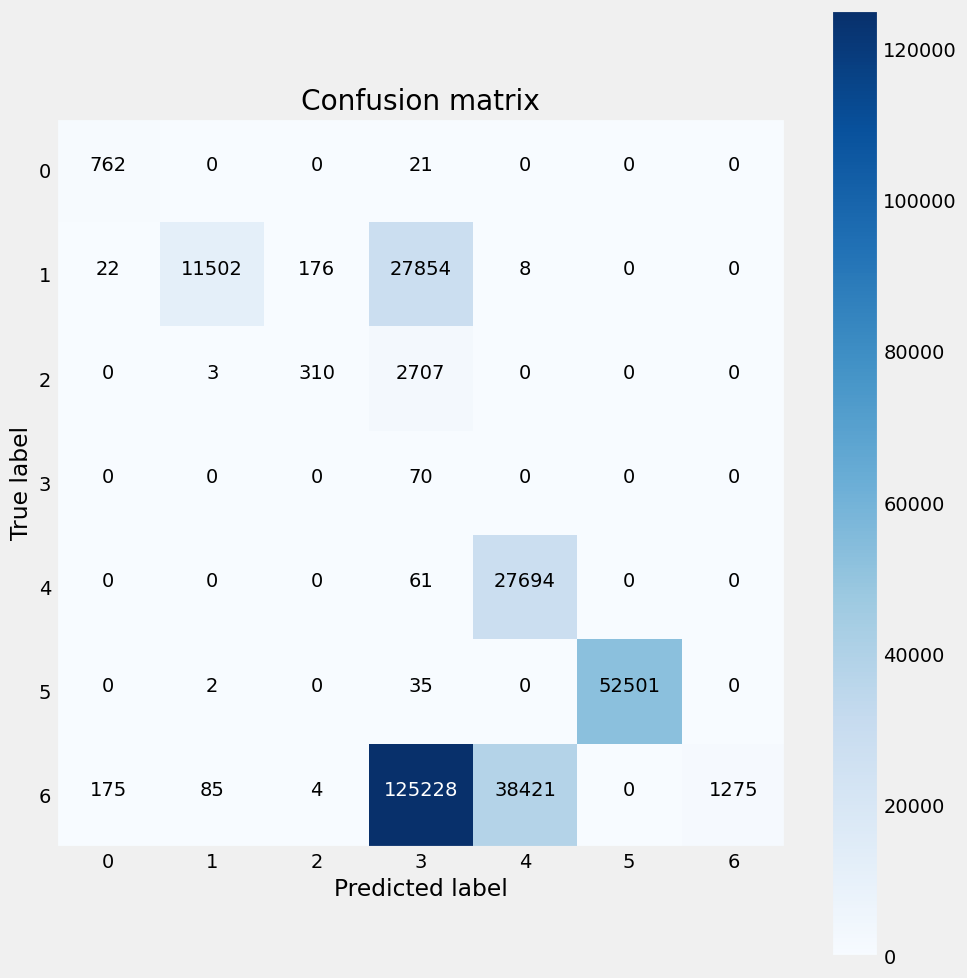

In [ ]:
print("\tTraining Naive Bayes")

(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
    pred_time,
) = learner.naive_bayes(selected_train_X, y_train_encoded, selected_test_X)

nb_metrics = evaluate_model("NB", y_test_encoded, class_test_y, pred_time)
all_results.append(("NB", nb_metrics))
plot_confusion_matrix(y_test_encoded, class_test_prob_y)


	Training XGradient Boosting
Time for XGB: 0.87 seconds
               precision    recall  f1-score   support

       Attack       1.00      0.99      0.99       783
       Benign       0.83      0.96      0.89     39562
          C&C       1.00      0.99      0.99      3020
C&C-HeartBeat       1.00      0.97      0.99        70
         DDoS       1.00      1.00      1.00     27755
        Okiru       1.00      1.00      1.00     52538
     PortScan       0.99      0.95      0.97    165188

     accuracy                           0.97    288916
    macro avg       0.97      0.98      0.98    288916
 weighted avg       0.97      0.97      0.97    288916



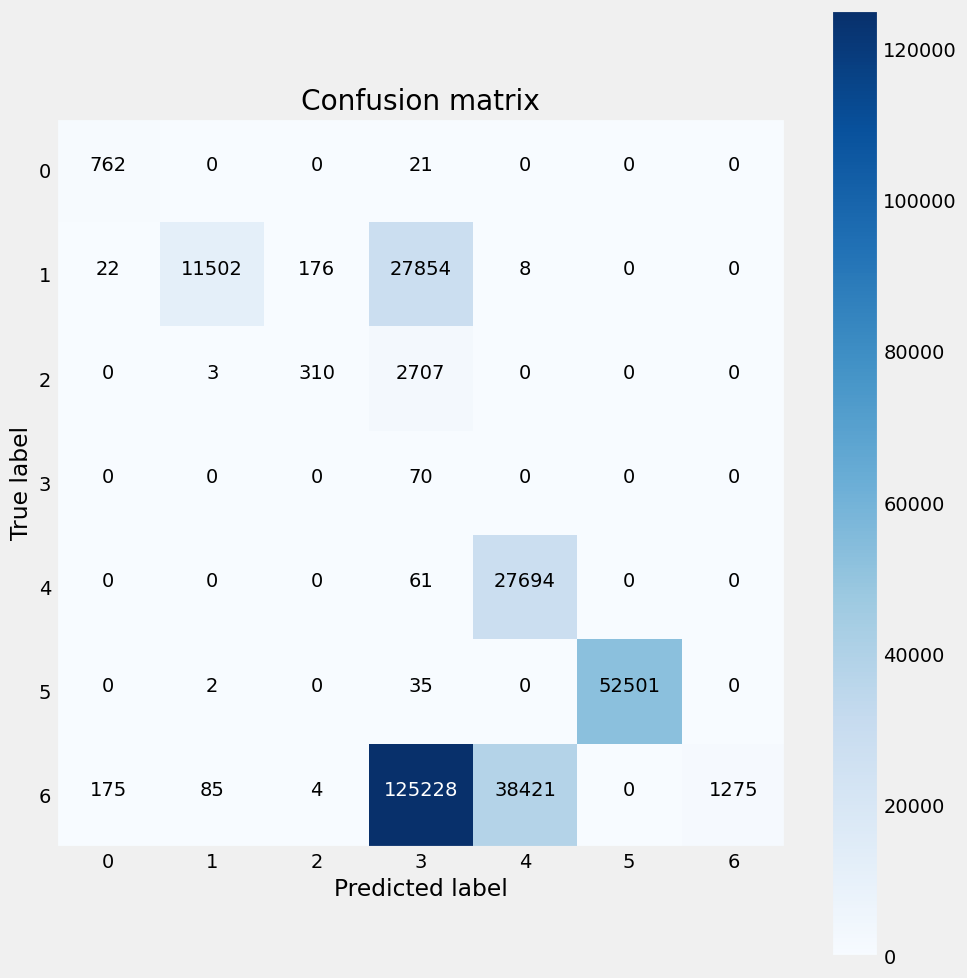

In [ ]:
print("\tTraining XGradient Boosting")

(
    class_train_y,
    class_test_y,
    pred_time,
) = learner.xgboost_classifier(selected_train_X, y_train_encoded, selected_test_X, gridsearch=False)

nb_metrics = evaluate_model("XGB", y_test_encoded, class_test_y, pred_time)
all_results.append(("XGB", nb_metrics))
plot_confusion_matrix(y_test_encoded, class_test_prob_y)


	Training random forest
Time for RF: 2.20 seconds
               precision    recall  f1-score   support

       Attack       1.00      0.99      0.99       783
       Benign       0.95      0.82      0.88     39562
          C&C       1.00      0.99      1.00      3020
C&C-HeartBeat       1.00      0.89      0.94        70
         DDoS       1.00      1.00      1.00     27755
        Okiru       1.00      1.00      1.00     52538
     PortScan       0.96      0.99      0.97    165188

     accuracy                           0.97    288916
    macro avg       0.99      0.96      0.97    288916
 weighted avg       0.97      0.97      0.97    288916



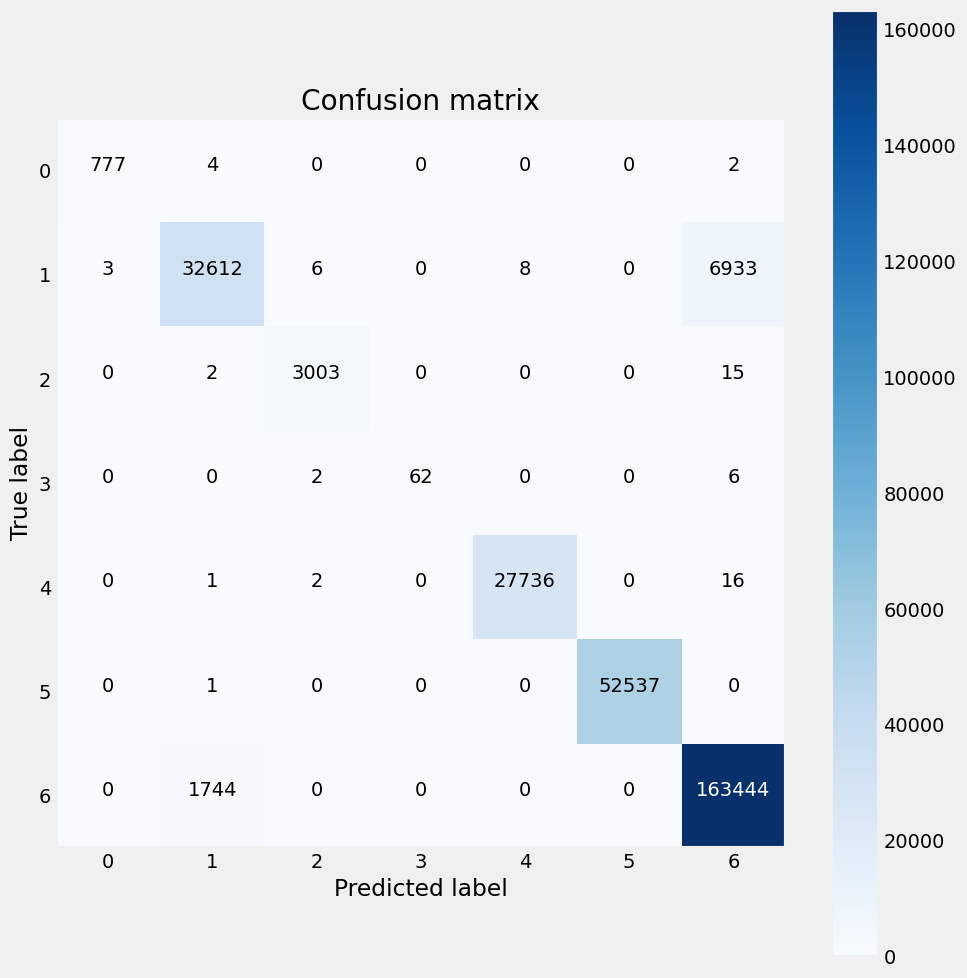

In [ ]:
print("\tTraining random forest")
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
    pred_time,
) = learner.random_forest(selected_train_X, y_train_encoded, selected_test_X ,gridsearch=False)
nb_metrics = evaluate_model("RF", y_test_encoded, class_test_y, pred_time)
all_results.append(("RF", nb_metrics))
plot_confusion_matrix(y_test_encoded, class_test_prob_y)

Deep Learning: CNN

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:

# Prepare data
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Map labels to integers
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=42, test_size=0.2)

X_train=X_train.copy()
X_test=X_test.copy()
# One-hot encode the labels
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Verify the number of classes
num_classes = len(label_encoder.classes_)

c:\Users\Infomedia\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,527 (45.03 KB)

 Trainable params: 11,527 (45.03 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
18058/18058 - 25s - 1ms/step - accuracy: 0.6082 - loss: 170.6709
Epoch 2/10
18058/18058 - 23s - 1ms/step - accuracy: 0.6598 - loss: 304.5281
Epoch 3/10
18058/18058 - 23s - 1ms/step - accuracy: 0.6547 - loss: 217.0411
Epoch 4/10
18058/18058 - 24s - 1ms/step - accuracy: 0.6522 - loss: 170.3340
Epoch 5/10
18058/18058 - 46s - 3ms/step - accuracy: 0.6549 - loss: 52.4970
Epoch 6/10
18058/18058 - 30s - 2ms/step - accuracy: 0.6555 - loss: 623.1353
Epoch 7/10
18058/18058 - 26s - 1ms/step - accuracy: 0.6514 - loss: 84.2449
Epoch 8/10
18058/18058 - 39s - 2ms/step - accuracy: 0.6555 - loss: 82.0409
Epoch 9/10
18058/18058 - 23s - 1ms/step - accuracy: 0.6520 - loss: 64.6062
Epoch 10/10
18058/18058 - 23s - 1ms/step - accuracy: 0.6349 - loss: 4.1171
CNN Model Performance:
Training Time: 283.4678010940552 seconds
Evaluation (loss/accuracy) Time: 9.811270713806152 seconds
Prediction Time: 6.995035171508789 seconds
Accuracy: 0.6567999124526978
Time for CNN: 7.00 seconds
               precisio

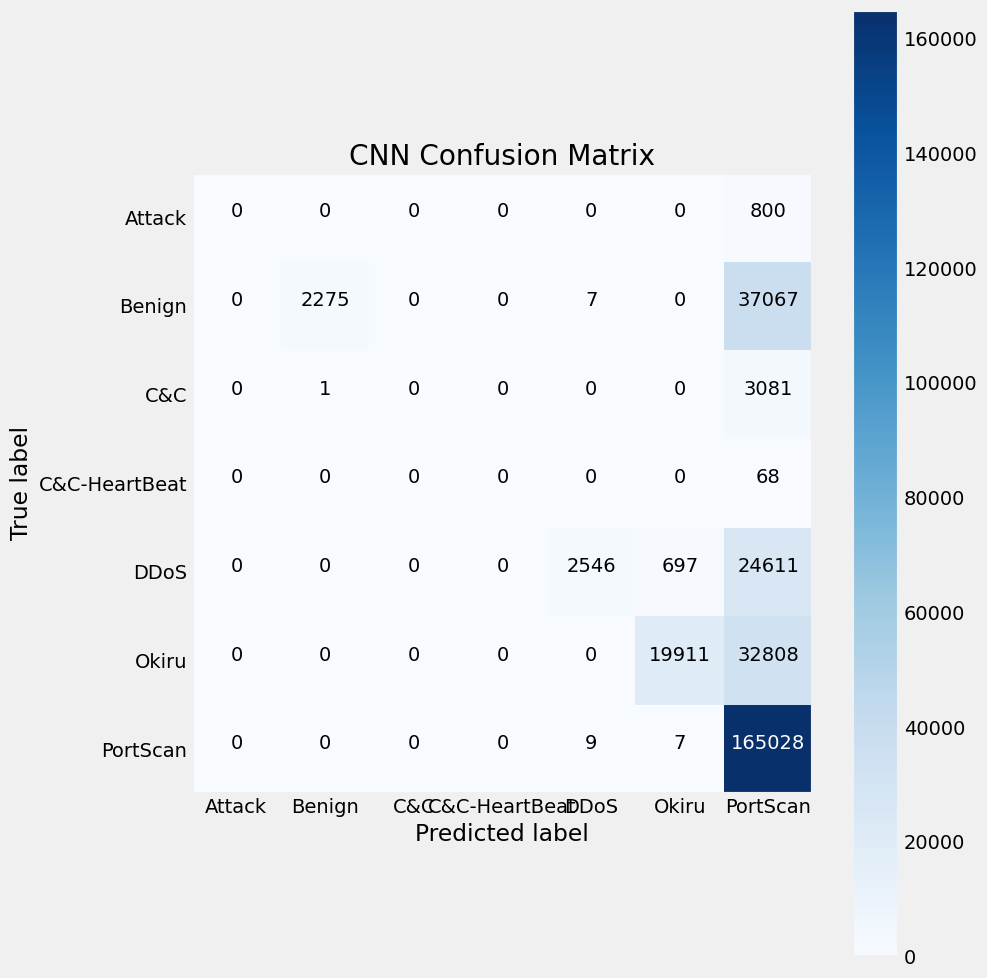

In [ ]:



# Build the model
cnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer matches num_classes
])
cnn_model.summary()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
start_train_time = time.time()
cnn_model.fit(X_train, y_train_encoded, epochs=10, batch_size=64, verbose=2)
cnn_training_time = time.time() - start_train_time

# Evaluate the model
start_eval_time = time.time()
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test_encoded, verbose=0)
cnn_prediction_time = time.time() - start_eval_time

# Predict labels
start_pred_time = time.time()
y_pred_probs = cnn_model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
pred_time = time.time() - start_pred_time

# Evaluate model performance
print("CNN Model Performance:")
print("Training Time:", cnn_training_time, "seconds")
print("Evaluation (loss/accuracy) Time:", cnn_prediction_time, "seconds")
print("Prediction Time:", pred_time, "seconds")
print("Accuracy:", cnn_accuracy)

# Now use your evaluate_model function
nb_metrics= evaluate_model("CNN", y_test, y_pred_classes, pred_time)
all_results.append(("CNN", nb_metrics))
# Also use plot_confusion_matrix function
# First prepare a DataFrame for prediction probabilities
y_pred_prob_df = pd.DataFrame(y_pred_probs, columns=label_encoder.classes_)
# Important: decode y_test back to original labels
y_test_labels = label_encoder.inverse_transform(y_test)

plot_confusion_matrix(y_test_labels, y_pred_prob_df, title="CNN Confusion Matrix")

In [ ]:
# ------------- Save metrics to score_df -------------
score_df=pd.DataFrame()
models, metrics = zip(*all_results)
new_scores = pd.DataFrame({
    "model": models,
    "accuracy": [m["accuracy"] for m in metrics],
    "precision_weighted": [m["precision_weighted"] for m in metrics],
    "recall_weighted": [m["recall_weighted"] for m in metrics],
    "f1_weighted": [m["f1_weighted"] for m in metrics],
    "execution_time": [m["execution_time"] for m in metrics],
})

score_df = pd.concat([score_df, new_scores], ignore_index=True)

In [ ]:
score_df

,model,accuracy,precision_weighted,recall_weighted,f1_weighted,execution_time
0,NB,0.325749,0.938467,0.325749,0.313015,3.850050
1,XGB,0.967496,0.971212,0.967496,0.968408,0.868469
2,RF,0.969732,0.969555,0.969732,0.968907,2.195943
3,CNN,0.656800,0.766004,0.656800,0.570119,6.995035


In [ ]:
score_df.columns

Index(['model', 'accuracy', 'precision_weighted', 'recall_weighted',
       'f1_weighted', 'execution_time'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


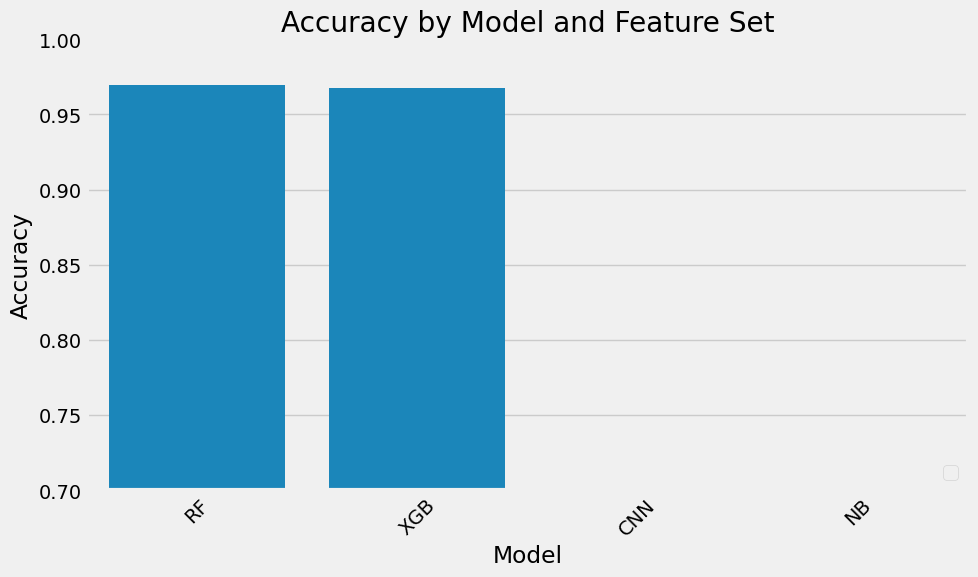

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


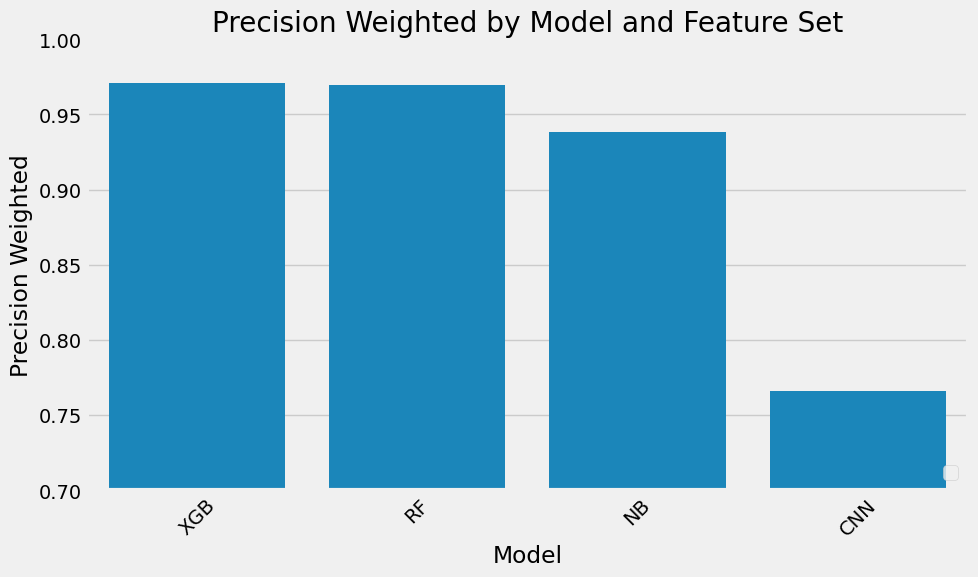

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


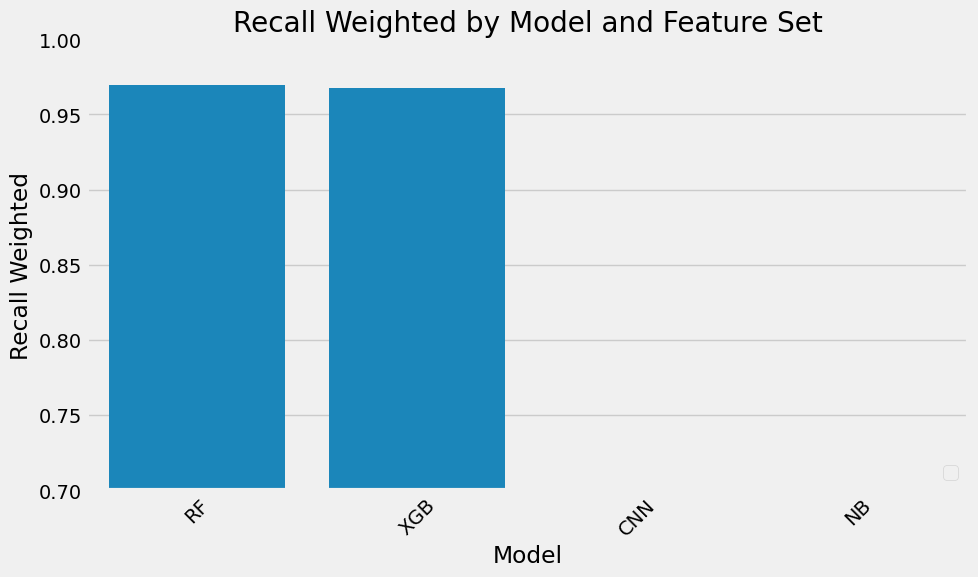

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


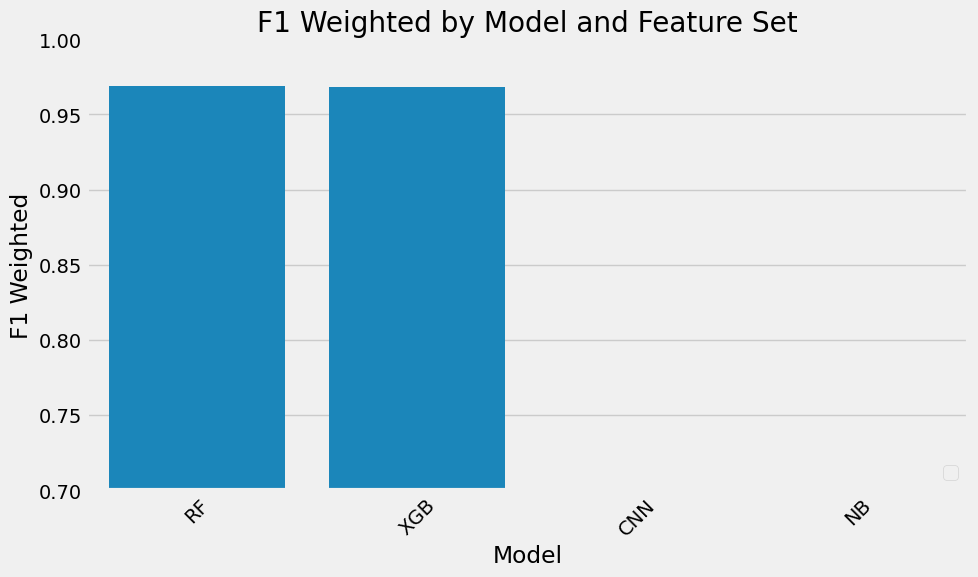

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


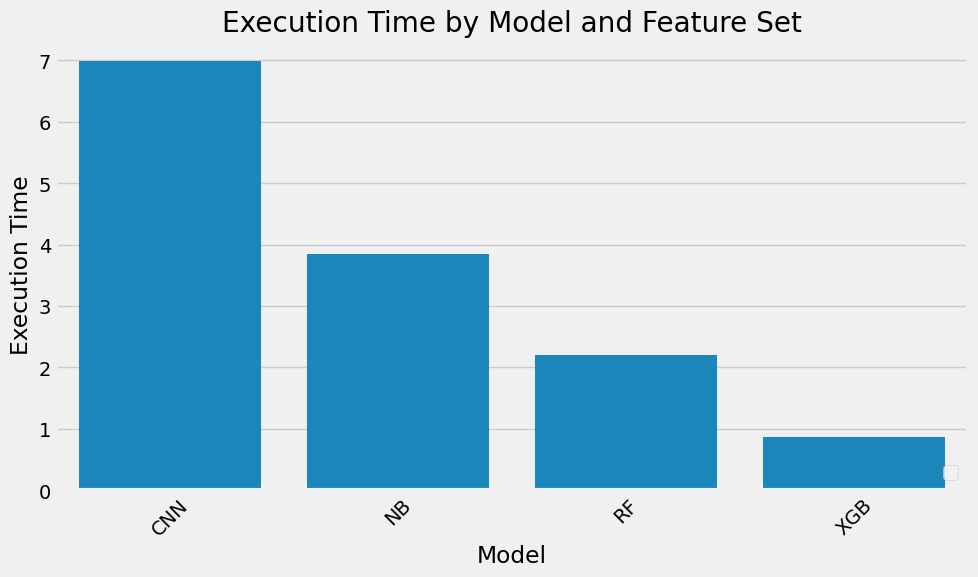

In [ ]:

columns = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'execution_time']

for col in columns:
    # Sort the DataFrame by the current column
    sorted_df = score_df.sort_values(by=col, ascending=False)

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x="model", y=col,  data=sorted_df)

    # Set plot labels and limits
    plt.xlabel("Model")
    plt.ylabel(col.replace('_', ' ').title())  # e.g., "F1 Weighted"

    # Only apply ylim for metrics with range [0,1]
    if col != "execution_time":
        plt.ylim(0.7, 1)

    plt.title(f"{col.replace('_', ' ').title()} by Model and Feature Set")
    plt.legend(loc="lower right")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


C:\Users\Infomedia\AppData\Local\Temp\ipykernel_12672\890864598.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=long_df, x='metric', y='score', hue='model', ci=None)


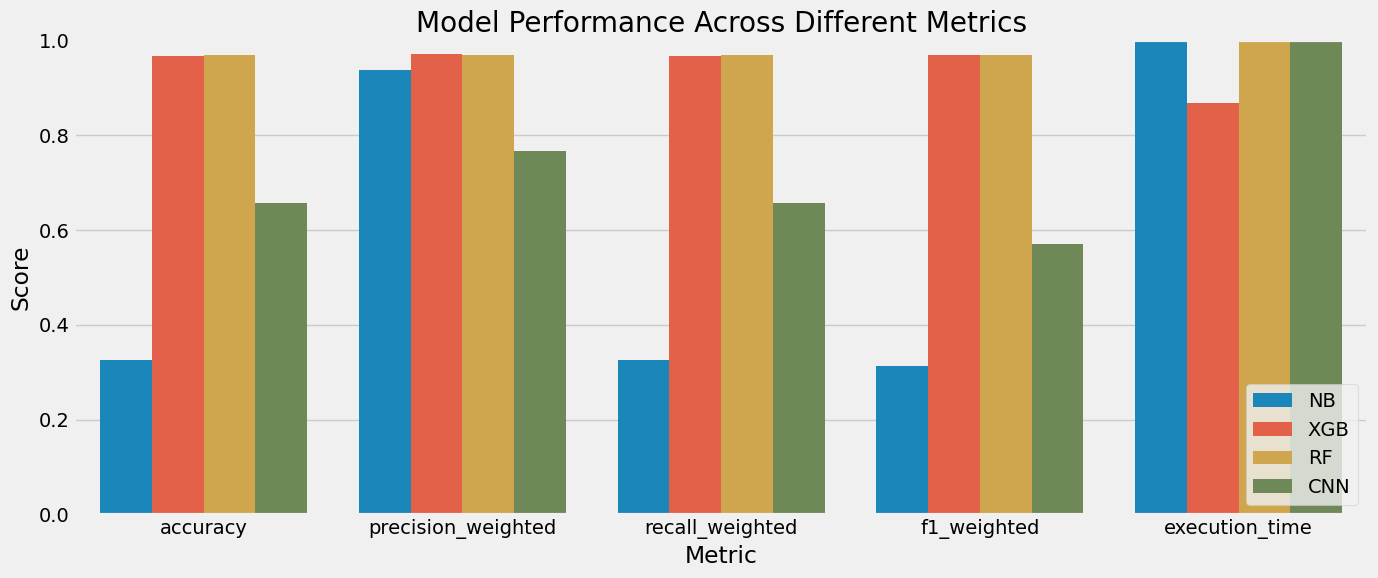

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Melt the DataFrame to long format
metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'execution_time']

long_df = score_df.melt(
    id_vars=['model'],
    value_vars=metrics,
    var_name='metric',
    value_name='score'
)

# Step 2: Plot all metrics in one grouped barplot
plt.figure(figsize=(14, 6))
sns.barplot(data=long_df, x='metric', y='score', hue='model', ci=None)

plt.title('Model Performance Across Different Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.ylim(0, 1 if long_df['metric'].isin(metrics[:-1]).any() else None)  # assumes all but execution_time are [0,1]
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Melt des données
metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'execution_time']
long_df = score_df.melt(id_vars=['model'], value_vars=metrics, var_name='metric', value_name='score')

# Création du barplot
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=long_df, x='metric', y='score', hue='model', ci=None, dodge=True)

# Ajout des labels près de la base
for p in ax.patches:
    height = p.get_height()
    if height > 0.001:  # Ignore les barres de hauteur quasi-nulle
        ax.text(
            x=p.get_x() + p.get_width()/2,
            y=0.1,  # Position près de la base
            s=f'{height:.4f}' if p.get_x() < len(metrics) - 0.5 else f'{height:.2f}s',  # Format différent pour le temps
            ha='center',
            va='bottom',
            color='black',
            fontsize=12,
            bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2')
        )

plt.title('La performance des modèles selon différentes métriques')
plt.ylim(0, 1 if long_df['metric'].isin(metrics[:-1]).any() else None)  # assumes all but execution_time are [0,1]
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

NameError: name 'score_df' is not defined